In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
import py3Dmol
from Bio.PDB import MMCIFParser
from pathlib import Path

In [30]:
def plot_pae(pae_path):
    """Plot the PAE heatmap."""
    pae = np.load(pae_path)['pae']
    plt.figure(figsize=(6,6))
    plt.imshow(pae, origin='lower', cmap='viridis')
    plt.colorbar(label='PAE (Å)')
    plt.title('Predicted Alignment Error')
    plt.xlabel('Residue i')
    plt.ylabel('Residue j')
    plt.show()


def show_structure(structure_path, plddt_path=None, style='cartoon'):
    """Display the 3D structure inline in Jupyter, optionally colored by pLDDT scores."""
    with open(structure_path) as f:
        struct_txt = f.read()
    view = py3Dmol.view(width=600, height=600)
    
    # Determine format by extension
    fmt = 'cif' if str(structure_path).endswith(('.cif', '.mmcif')) else 'pdb'
    view.addModel(struct_txt, fmt)
    
    if plddt_path and Path(plddt_path).exists():
        # Load pLDDT scores
        plddt = np.load(plddt_path)['plddt']

        # Color by pLDDT: very confident (>.9) = blue, confident (.9-<.7) = cyan, low confidence (50-70) = yellow, very low (<50) = red
        for i, score in enumerate(plddt):
            resi = i + 1  # pLDDT is 0-indexed, residue numbers are 1-indexed
            if score > 0.9:
                color = 'blue'
            elif score > 0.7:
                color = 'lightblue'
            elif score > 0.5:
                color = 'yellow'
            else:
                color = 'orange'
            
            view.setStyle({'resi': resi}, {style: {'color': color}})
        
        print("Structure colored by pLDDT confidence:")
        print("Blue: Very confident (>90)")
        print("Light Blue: Confident (70-90)")
        print("Yellow: Low confidence (50-70)")
        print("Orange: Very low confidence (<50)")
    else:
        view.setStyle({style: {}})
        if plddt_path:
            print(f"pLDDT file not found at: {plddt_path}")
            print("Showing structure without pLDDT coloring")
    
    view.setBackgroundColor('0xeeeeee')
    view.zoomTo()
    return view.show()


Structure colored by pLDDT confidence:
Blue: Very confident (>90)
Light Blue: Confident (70-90)
Yellow: Low confidence (50-70)
Orange: Very low confidence (<50)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

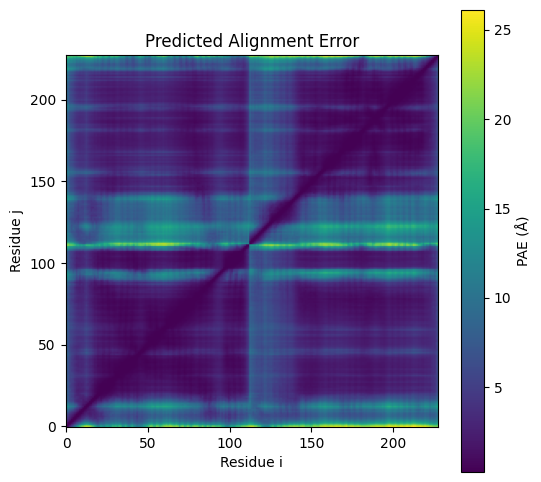

In [31]:
## TODO: change this!
protein_name = 'test_protein'

# plotting code
base_path = Path(f'output/boltz/boltz_results_yaml/predictions/{protein_name}')
structure_path = base_path / f'{protein_name}_model_0.cif' 
pae_path = base_path / f'pae_{protein_name}_model_0.npz'
plddt_path = base_path / f'plddt_{protein_name}_model_0.npz'

if structure_path.exists():
    show_structure(structure_path, plddt_path)
    plot_pae(pae_path)